In [1]:
# imports
import requests
import pandas as pd
from census import Census
import matplotlib.pyplot as plt

# api keys
from config import wkey, epakey, censuskey, epaemail

In [ ]:
# Abby's section starts here

In [5]:
# PurpleAir API

purple_air_df = pd.DataFrame()
purple_air_df['Index'] = [x for x in range(10000)]
purple_air_df = purple_air_df.set_index('Index')
purple_air_df['PLat'] = ""
purple_air_df['PLng'] = ""
purple_air_df['PLocation'] = ""
purple_air_df['PPM2_5'] = ""
purple_air_df['PDataDate'] = ""

base_url = "https://www.purpleair.com/json"
response = requests.get(base_url).json()

for index, row in purple_air_df.iterrows():
    
    try:
        purple_air_df.loc[index, 'PLat'] = response['results'][index]['Lat']
        purple_air_df.loc[index, 'PLng'] = response['results'][index]['Lon']
        purple_air_df.loc[index, 'PLocation'] = response['results'][index]['DEVICE_LOCATIONTYPE']
        purple_air_df.loc[index, 'PPM2_5'] = response['results'][index]['PM2_5Value']
        purple_air_df.loc[index, 'PDataDate'] = response['results'][index]['LastSeen']
#         could also pull time since last seen and only grab values from the last hour
    except:
        pass

purple_air_df = purple_air_df.dropna()
purple_air_df

,PLat,PLng,PLocation,PPM2_5,PDataDate
Index,,,,,
0,37.2756,-121.964,outside,3.64,1580175504
1,37.2756,-121.964,,,
2,30.0538,-95.4946,outside,21.4,1580175485
3,30.0538,-95.4946,,,
4,37.7224,-122.439,outside,14.52,1580175463
...,...,...,...,...,...
9995,33.907,-6.98929,,,
9996,40.4751,22.9599,outside,54.13,1580175565
9997,40.4751,22.9599,,,


In [37]:
purple_air_df = purple_air_df.loc[purple_air_df['PLocation']=='outside']
purple_air_df

,PLat,PLng,PLocation,PPM2_5,PDataDate
Index,,,,,
0,37.2756,-121.964,outside,3.64,1580175504
2,30.0538,-95.4946,outside,21.4,1580175485
4,37.7224,-122.439,outside,14.52,1580175463
6,36.8074,-119.796,outside,22.92,1580175535
8,42.7144,-73.2021,outside,1.89,1580175494
...,...,...,...,...,...
9990,37.4732,-121.916,outside,2.6,1580175530
9992,20.2507,-155.813,outside,0.53,1580175471
9994,33.907,-6.98929,outside,44.06,1580175515


In [42]:
# EPA API
# sample data (lowest granularity date) by box (lat, long range)

lat_lng_range = 0.001

pollutant = '88101'
beginning_date = 20200126
end_date = beginning_date+1

locations = purple_air_df[['PLat', 'PLng']]
lat_range = pd.DataFrame()
lat_range['Min Lat'] = locations.loc[:,'PLat'] - lat_lng_range
lat_range['Max Lat'] = locations.loc[:,'PLat'] + lat_lng_range
lng_range = pd.DataFrame()
lng_range['Min Lng'] = locations.loc[:,'PLng'] - lat_lng_range
lng_range['Max Lng'] = locations.loc[:,'PLng'] + lat_lng_range

# for minvalue, maxvalue in (zip(lat_range, lng_range)):
# #     for minlng, maxlng in lng_range:

#     base_url = "https://aps.eap.gov/data/api/sampleData/byBox?"
#     url = f'{base_url}email={epaemail}&key={epakey}&param={pollutant}&bdate={beginning_date}&edate={end_date}&minlat={minvalue}&maxlat={maxvalue}&minlon={minvalue}&maxlon={maxvalue}'
#     response = requests.get(url).json()
#     print(response)
#     #     try:
    

# minlat = 37.2756-0.001
# maxlat = 37.2756+0.001
# minlng = -121.964-0.001
# maxlng = -121.964+0.001

minlat = 37.2746
maxlat = 37.2766
minlng = -121.963
maxlng = -121.965
base_url = "https://aps.eap.gov/data/api/sampleData/byBox?"
url = f'{base_url}email={epaemail}&key={epakey}&param={pollutant}&bdate={beginning_date}&edate={end_date}&minlat={minlat}&maxlat={maxlat}&minlon={minlng}&maxlon={maxlng}'
response = requests.get(url).json()
print(response)
        

# ex: https://aqs.epa.gov/data/api/sampleData/byBox?email=test@aqs.api&key=test&param=44201&bdate=20150501&edate=20150502&minlat=33.3&maxlat=33.6&minlon=-87.0&maxlon=-86.7
# https://aqs.epa.gov/data/api/sampleData/byBox?email=abby.lemon22@gmail.com&key=indigogoose44&param=88101&bdate=20200126&edate=20200127&minlat=37.2746&maxlat=37.2766&minlon=-121.963&maxlon=-121.965

ConnectionError: HTTPSConnectionPool(host='aps.eap.gov', port=443): Max retries exceeded with url: /data/api/sampleData/byBox?email=abby.lemon22@gmail.com&key=indigogoose44&param=88101&bdate=20200126&edate=20200127&minlat=37.2746&maxlat=37.2766&minlon=-121.963&maxlon=-121.965 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x118b37da0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [34]:
# EPA API
# EPA Air Quality Section
# yearly data by state (minnesota)

pm2_5_1Hour = []
pm2_5_24HourBulk = []
pm2_5_24Hour = []
year_list = []
years = [x for x in range(1990,2020)]

email = 'abby.lemon22@gmail.com'
state_code = "27" 
# PM2.5 - Local Conditions
pollutant = "88101"

for year in years:
    beginging_date = f"{year}0502"
    end_date = f"{year}0502"
    base_url = "https://aqs.epa.gov/data/api/annualData/byState?"
    url = f'{base_url}email={email}&key={epakey}&param={pollutant}&bdate={beginging_date}&edate={end_date}&state={state_code}'
    response = requests.get(url).json()
    try:
        pm2_5_1Hour.append(response['Data'][0]['arithmetic_mean'])
        pm2_5_24HourBulk.append(response['Data'][1]['arithmetic_mean'])
        pm2_5_24Hour.append(response['Data'][5]['arithmetic_mean'])
        year_list.append(response['Data'][0]['year'])
    except:
        print(f"No data found, skip {year}.")
        pass



No data found, skip 1990.
No data found, skip 1991.
No data found, skip 1992.
No data found, skip 1993.
No data found, skip 1994.
No data found, skip 1995.
No data found, skip 1996.
No data found, skip 1997.
No data found, skip 1998.


In [35]:
pm2_5_df = pd.DataFrame([year_list,pm2_5_1Hour,pm2_5_24HourBulk,pm2_5_24Hour]).T
pm2_5_df = pm2_5_df.rename(columns={0:'Year',
                                    1:'PM 2.5 1 hour',
                                    2:'PM 2.5 24 hour bulk',
                                    3:'PM 2.5 24 hour'
})
pm2_5_df['Year'] = pm2_5_df['Year'].astype(int)
# pm2_5_df['PM 2.5'] = pm2_5
pm2_5_df.to_csv("Resource/EPAData_per_year_MN.csv")
pm2_5_df

,Year,PM 2.5 1 hour,PM 2.5 24 hour bulk,PM 2.5 24 hour
0,1999,10.050000,10.050000,11.355556
1,2000,9.532353,9.532353,12.748649
2,2001,12.737931,12.737931,8.647368
3,2002,10.081034,10.081034,9.828829
4,2003,7.150000,7.150000,9.376316
5,2004,8.204545,8.204545,5.416949
6,2005,10.305128,10.305128,6.614035
7,2006,8.764706,8.764706,6.421311
8,2007,9.593966,9.593966,8.778571
9,2008,9.490598,9.490598,10.006667


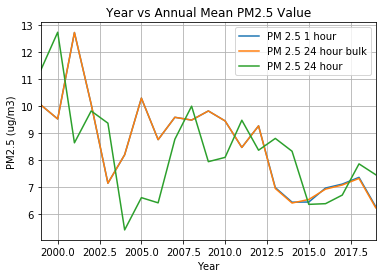

In [39]:
pm_plot = pm2_5_df.plot(kind='line', x='Year',y=['PM 2.5 1 hour','PM 2.5 24 hour bulk','PM 2.5 24 hour'],grid=True)
plt.ylabel('PM2.5 (ug/m3)')
plt.title("Year vs Annual Mean PM2.5 Value")
plt.savefig("Images/YearvsAnnualMeanPM2_5Value.png")
plt.show()

In [ ]:
# Census API
# Thinking I might not need to pull Census data.

c = Census(censuskey, year=2018)
# need to get this working for 2019, what is the difference between 2010 and 2019?
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E", "B19301_001E", "B17001_002E"), {'for': 'zip code tabulation area:*'})

census_pd = pd.DataFrame(census_data)
census_pd

In [ ]:
# Abby's section ends here

In [ ]:
# Alan's section starts here

In [ ]:
# Alan's section ends here

In [ ]:
# Brandon's section starts here

In [ ]:
# Brandon's section ends here